In [1]:
import os
import cv2
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image as imgpil
import warnings
warnings.simplefilter('ignore')

Using TensorFlow backend.


In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
annots_file = spio.loadmat('devkit/cars_train_annos')
annotations = annots_file['annotations']
annotations = np.transpose(annotations)

In [3]:
fnames = []
clasid = []
labels = []

In [4]:
for annotation in annotations:
    clas_id = annotation[0][4][0][0]
    file_nm = annotation[0][5][0]
    fnames.append(file_nm)
    clasid.append(clas_id)
    labels.append( '%04d' % (clas_id,) )

In [5]:
meta_file = spio.loadmat('devkit/cars_meta')
class_names = meta_file['class_names']                      # given (1, 196)
class_names = np.transpose(class_names)

In [6]:
def process_img(img):
    img = img.resize( (224, 224), imgpil.ANTIALIAS )
    img = np.array(img)
    img = img / np.max(img).astype(float)
    # img = np.reshape( img, [224,224,3] )
    img = np.reshape( img, [1,224,224,3] )
    return img

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


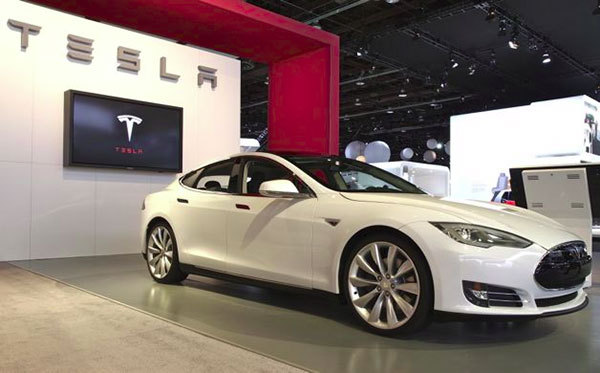

In [7]:
model = load_model('b3-model.h5')
# tmpimg = plt.imread('cars_demo/' + fnames[0])
# plt.imshow(tmpimg)
tmpimg = imgpil.open('cars_demo/' + fnames[4])              # choose demo image, 0-4
tmpimg

In [8]:
tstimg = process_img(tmpimg)
predictions = model.predict(tstimg)
p_class = np.argmax(predictions)                            # predicted class
# print(p_class)
print('Prediction: {}'.format(class_names[p_class][0][0]))

Prediction: Tesla Model S Sedan 2012


In [9]:
print('Score: {:.2%}'.format(predictions[0][p_class]))

Score: 72.02%
